In [1]:
#感知机是根据输入实例的特征向量x对其进行二分类的线性分类模型:f(x) = w*x + b
#感知机模型对应输入空间中的分离超平面w*x+b=0
#损失函数minL(w，b) = -sum(w*xi+b)*yi，其中(xi，yi)是误分类集合中的点

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [10]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label'] = iris.target
df.columns=['sepal length','sepal width','petal length','petal width','label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

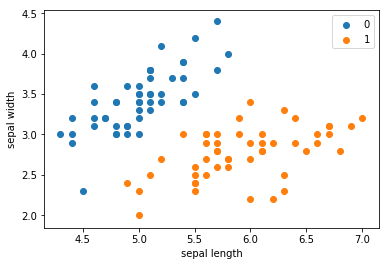

In [11]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


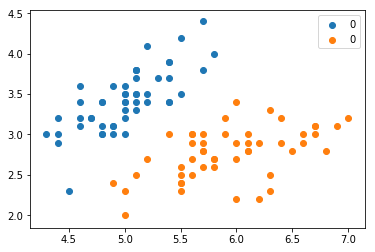

In [64]:
iris_data = load_iris()
print(iris_data.feature_names)
iris = iris_data.data
iris_length = iris[:,0]
iris_width = iris[:,1]
targets = iris_data.target
iris_length_0 = iris_length[targets==0]
iris_width_0 = iris_width[targets==0]
iris_length_1 = iris_length[targets==1]
iris_width_1 = iris_width[targets==1]
T = []
for i in range(len(iris_length_0)):
    T.append([iris_length_0[i],iris_width_0[i],-1])
for i in range(len(iris_length_1)):
    T.append([iris_length_1[i],iris_width_1[i],1])
T = np.array(T)
plt.scatter(T[T[:,2]==-1][:,0],T[T[:,2]==-1][:,1],label='0')
plt.scatter(T[T[:,2]==1][:,0],T[T[:,2]==1][:,1],label='0')
plt.legend()

In [60]:
class Model:
    def __init__(self,data):
        self.w = np.zeros(len(data[0])-1,dtype=np.float32)
        print(self.w)
        self.b = 0
        self.learn_rate = 0.1
    def sign(self,x,w,b):
        y = np.dot(w,x.T) + b
        return y
    def fit(self,x_train,y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(x_train)):
                x = x_train[d]
                y = y_train[d]
                if (y*self.sign(x,self.w,self.b)) <= 0:
                    wrong_count += 1
                    self.w = self.w + self.learn_rate*np.dot(y,x)
                    self.b = self.b + self.learn_rate*y
            if wrong_count == 0:
                is_wrong = True
        return 'perceptron Model'

In [61]:
perceptron = Model(T)
print(T[:,2])
perceptron.fit(T[:,0:2],T[:,2])

[0. 0.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


'perceptron Model'

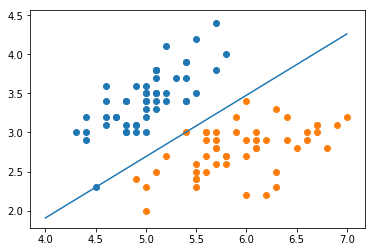

In [65]:
x = np.linspace(4,7,10)
y = -(perceptron.w[0]*x+perceptron.b)/perceptron.w[1]
plt.plot(x,y)
plt.scatter(T[T[:,2]==-1][:,0],T[T[:,2]==-1][:,1],label='0')
plt.scatter(T[T[:,2]==1][:,0],T[T[:,2]==1][:,1],label='0')

In [74]:
import sklearn
from sklearn.linear_model import Perceptron

In [132]:
clf = Perceptron(fit_intercept=True,max_iter=1000,shuffle=True,tol=None)
clf.fit(T[:,0:2],T[:,2])

/home/dynamicw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=1000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [105]:
clf.coef_

array([[ 20.6, -35.4]])

In [106]:
clf.intercept_

array([-5.])

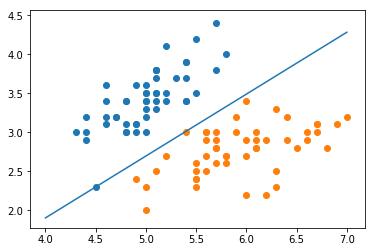

In [133]:
x_ponits = np.arange(4,8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)
plt.scatter(T[T[:,2]==-1][:,0],T[T[:,2]==-1][:,1],label='0')
plt.scatter(T[T[:,2]==1][:,0],T[T[:,2]==1][:,1],label='0')